In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
subjects,obs_time,end_date,ans_T0,agreement,subject_file_T0, subject_sol_T0=np.loadtxt('JetOrNot/subjects_{}.csv'.format('T0'),delimiter=',',unpack=True,dtype=str)
obs_time_T0=np.array(obs_time,dtype='datetime64')
end_date_T0=np.array(end_date,dtype='datetime64')
subjects_T0=subjects.astype(int)
agreement_T0=agreement.astype(float)

subjects,obs_time,end_date,ans_T3,agreement,subject_file_T3, subject_sol_T3=np.loadtxt('BoxTheJets/subjects_{}.csv'.format('T3'),delimiter=',',unpack=True,dtype=str)
obs_time_T3=np.array(obs_time,dtype='datetime64')
end_date_T3=np.array(end_date,dtype='datetime64')
subjects_T3=subjects.astype(int)
agreement_T3=agreement.astype(float)

subjects,obs_time,end_date,ans_Tc,agreement,subject_file_Tc, subject_sol_Tc=np.loadtxt('subjects_{}.csv'.format('Tc'),delimiter=',',unpack=True,dtype=str)
obs_time_Tc=np.array(obs_time,dtype='datetime64')
end_date_Tc=np.array(end_date,dtype='datetime64')
subjects_Tc=subjects.astype(int)
agreement_Tc=agreement.astype(float)

Jet/Not workflow 1212 2749 3961
Box the Jet question 797 420 1217
Combined results 853 3108 3961


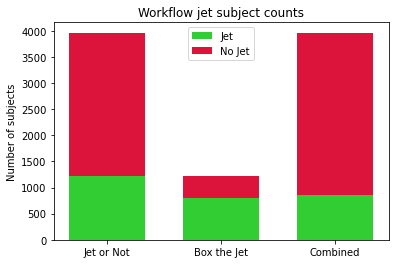

In [16]:
#Get the agreements masks
jet_mask_T0, non_jet_mask_T0= ans_T0=='y', ans_T0=='n'
jet_mask_T3, non_jet_mask_T3= ans_T3=='y', ans_T3=='n'
jet_mask_Tc, non_jet_mask_Tc= ans_Tc=='y', ans_Tc=='n'

print('Jet/Not workflow', np.count_nonzero(jet_mask_T0),np.count_nonzero(non_jet_mask_T0),len(subjects_T0))
plt.bar(0,np.count_nonzero(jet_mask_T0),color='limegreen',width=0.1,label='Jet')
plt.bar(0,np.count_nonzero(non_jet_mask_T0),color='crimson',width=0.1,bottom=np.count_nonzero(jet_mask_T0),label='No Jet')

#Second workflow
print('Box the Jet question',np.count_nonzero(jet_mask_T3),np.count_nonzero(non_jet_mask_T3),len(subjects_T3))
plt.bar(0.15,np.count_nonzero(jet_mask_T3),color='limegreen',width=0.1)
plt.bar(0.15,np.count_nonzero(non_jet_mask_T3),color='crimson',width=0.1,bottom=np.count_nonzero(jet_mask_T3))

#Combined results
print('Combined results',np.count_nonzero(jet_mask_Tc),np.count_nonzero(non_jet_mask_Tc),len(subjects_Tc))
plt.bar(0.3,np.count_nonzero(jet_mask_Tc),color='limegreen',width=0.1)
plt.bar(0.3,np.count_nonzero(non_jet_mask_Tc),color='crimson',width=0.1,bottom=np.count_nonzero(jet_mask_Tc))

plt.ylabel('Number of subjects')
plt.xticks([0,0.15,0.3],['Jet or Not','Box the Jet','Combined'])
plt.title('Workflow jet subject counts')
plt.legend()
#plt.savefig('T0T3Tc_counts.png')
plt.show()
        

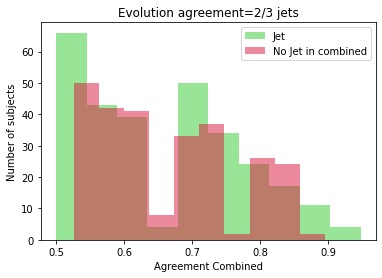

In [18]:
#Which subjects that had 0.66 agreement in 1st workflow stay jets after second workflow
i=agreement_T0==2/3 #mask where is the agreement 1st 0.66
y=ans_T0=='y' #Agreement where jet is found in 1st workflow
nc=ans_Tc=='n' #Agreement where Combined says no Jet
yc=ans_Tc=='y' #Agreement where Combined says Jet

plt.hist(agreement_Tc[i&yc],alpha=0.5,color='limegreen',label='Jet')
plt.hist(agreement_Tc[i&nc&y],alpha=0.5,color='crimson',label='No Jet in combined') #Locations where 1st says yes but combined says no
plt.xlabel('Agreement Combined')
plt.ylabel('Number of subjects')
plt.title('Evolution agreement=2/3 jets')
plt.legend()
#plt.savefig('Evo_agr_0.667.png')
plt.show()

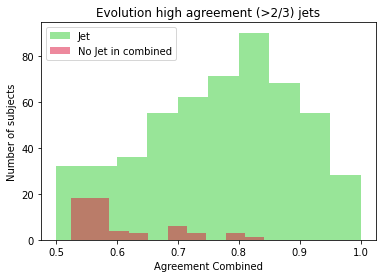

In [19]:
#Which subjects that had higher than 0.66 agreement in 1st workflow stay jets after second workflow
i=agreement_T0>2/3 #mask where is the agreement 0.66

plt.hist(agreement_Tc[i&yc],alpha=0.5,color='limegreen',label='Jet')
plt.hist(agreement_Tc[i&nc&y],alpha=0.5,color='crimson',label='No Jet in combined') #Locations where 1st says yes but combined says no
plt.xlabel('Agreement Combined')
plt.ylabel('Number of subjects')
plt.title('Evolution high agreement (>2/3) jets')
plt.legend()
#plt.savefig('Evo_agr_high.png')
plt.show()

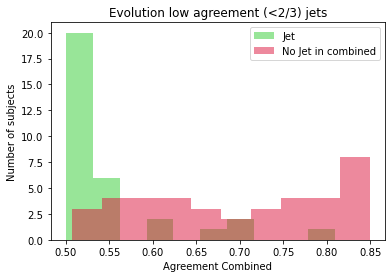

In [20]:
#Which subjects that had less than 0.66 agreement in 1st workflow stay jets after second workflow
i=agreement_T0<2/3 #mask where is the agreement 0.66

plt.hist(agreement_Tc[i&yc],alpha=0.5,color='limegreen',label='Jet')
plt.hist(agreement_Tc[i&nc&y],alpha=0.5,color='crimson',label='No Jet in combined') #Locations where 1st says yes but combined says no
plt.xlabel('Agreement Combined')
plt.ylabel('Number of subjects')
plt.title('Evolution low agreement (<2/3) jets')
plt.legend()
#plt.savefig('Evo_agr_low.png')
plt.show()

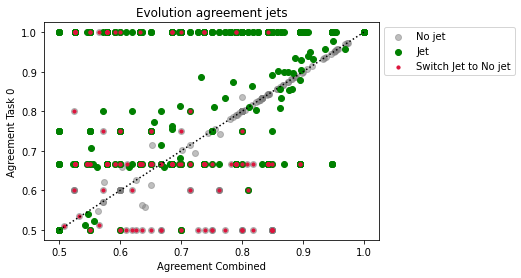

In [21]:
y=ans_T0=='y' #Agreement where jet is found in 1st workflow
n=ans_Tc=='n' #agreement where no jet is found in 1st workflow
nc=ans_Tc=='n' #Agreement where Combined says no Jet
yc=ans_Tc=='y' #Agreement where Combined says Jet
plt.scatter(agreement_Tc[nc&n],agreement_T0[nc&n],color='grey',alpha=0.5,label='No jet')
plt.scatter(agreement_Tc[yc&n],agreement_T0[yc&n],color='pink',alpha=0.5) #This does not occur no jet is not put through and then becomes a jet
plt.scatter(agreement_Tc[yc&y],agreement_T0[yc&y],color='green', label='Jet')
plt.scatter(agreement_Tc[nc&y],agreement_T0[nc&y],color='crimson',label='Switch Jet to No jet',s=10)
plt.plot(np.linspace(0.5,1,2),np.linspace(0.5,1,2),linestyle='dotted',color='black')
plt.xlabel('Agreement Combined')
plt.ylabel('Agreement Task 0')
plt.legend(bbox_to_anchor=(1.0, 1.0, 0, 0), loc='upper left')
plt.title('Evolution agreement jets')
#plt.savefig('Evo_agr_jet.png',bbox_inches='tight')
plt.show()


In [12]:

from astropy.io import ascii
import os
from skimage import io
from panoptes_client import Panoptes, Subject, Workflow
from dateutil.parser import parse
import getpass
import subprocess

import datetime
from matplotlib.dates import DateFormatter
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from IPython.display import Image

import csv

%matplotlib inline

In [22]:
#These are border subjects that are checked slightly different by the volunteers
#The subjects are being put through if we have 2 out of 3 saying yes, this will count the first 3 votes and 
#push it to new workflow even if all others later say no
#Also Ceasar will count one volunteer as one vote even if he votes multiple times
#e.q. 70444529 is checked by a volunteer twice so it will not be put through unless another volunteer says yes
#In this case the next said no so Ceasar did not push it thorugh the next workflow
jet_subjects = subjects_T0[jet_mask_T0]
non_jet_subjects = subjects_T0[non_jet_mask_T0]

for s in non_jet_subjects: #See which subjects which we count as non_jets are pushed by Caesar
    if s in subjects_T3:
        i=np.where(subjects_T3==s)
        print(subjects_T3[i],obs_time_T3[i],ans_T3[i],agreement_T3[i])
        #print (data_T3[data_T3['subject_id']==s])
print(' ')
for s in jet_subjects: #See which subjects which we count as jets are not pushed by Caesar
    if s not in subjects_T3:
        i=np.where(subjects_T0==s)
        print(subjects_T0[i],obs_time_T0[i],ans_T0[i],agreement_T0[i])
        
for s in subjects_T3: #There is only one subject not in the previous
    if s not in subjects_T0:
        i=np.where(subjects_T3==s)
        print(subjects_T3[i],obs_time_T3[i],ans_T3[i],agreement_T3[i]) #A test example, only one vote
    if len(np.where(subjects_T3==s))>1: #No double subjects in data2
        i=np.where(subjects_T3==s)
        print(subjects_T3[i],obs_time_T3[i],ans_T3[i],agreement_T3[i])



        


[70439689] ['2011-01-21T11:55:44'] ['n'] [0.8125]
[70440305] ['2011-07-08T06:53:44'] ['n'] [0.875]
[70440415] ['2011-08-01T04:34:56'] ['n'] [0.625]
[70440466] ['2011-08-01T09:04:56'] ['n'] [0.75]
[70440639] ['2011-12-30T15:11:44'] ['y'] [0.5]
[70440651] ['2011-12-31T16:31:08'] ['n'] [0.8125]
[70440835] ['2011-12-11T23:27:20'] ['y'] [0.5]
[70444807] ['2012-10-19T06:54:19'] ['n'] [0.8125]
[70444811] ['2012-10-19T22:15:31'] ['y'] [0.52173913]
[70444814] ['2012-10-19T22:25:55'] ['n'] [0.8125]
[70444820] ['2012-10-19T22:46:43'] ['n'] [0.8125]
[70444824] ['2012-10-19T22:57:19'] ['n'] [0.8125]
[70444829] ['2012-10-19T23:12:55'] ['n'] [0.6]
[70444844] ['2012-10-20T22:25:55'] ['n'] [0.6875]
[70444882] ['2012-12-29T09:51:31'] ['y'] [0.55555556]
[70444908] ['2012-12-29T14:52:19'] ['y'] [0.6]
[70444921] ['2012-12-30T01:00:07'] ['n'] [0.75]
 
[70439091] ['2011-03-20T13:26:08'] ['y'] [0.5]
[70439705] ['2011-01-21T13:18:56'] ['y'] [0.5]
[70439974] ['2011-05-28T06:14:44'] ['y'] [0.5]
[70439992] ['2011

In [32]:
def print_stat(task,path):
    SOL_small,subjects,filenames,times,Num,start,end,notes=np.loadtxt('{}SOL_{}_stats.csv'.format(path,task),delimiter=',',unpack=True,dtype=str)
    Num=Num.astype(float)
    print('For task {} we have:'.format(task))
    print('In total there are {} jets clusters found inside the events'.format(sum(Num)))
    print('There are {} events without jets'.format(len(np.argwhere(Num==0))))
    print('Event {} has the maximum jets with a total of {} jets'.format(SOL_small[np.argmax(Num)],max(Num)))
    #print('The events with no jets are {}'.format(SOL_small[np.where(Num==0)]))
    print('There are {} events with some flagged jets'.format(len(SOL_small[np.where(notes!='')]),SOL_small[np.where(notes!='')]))
    print('There are {} events with no flagged jets'.format(len(SOL_small[np.where(notes=='')])))
    #Jet s in these clusters without flag
    #Jetcluster start and end 
    
    return SOL_small,Num,start,end,notes

In [33]:
T0_SOL_small,T0_Num,T0_start,T0_end,T0_notes=print_stat('T0','JetOrNot/')
print(' ')
T3_SOL_small,T3_Num,T3_start,T3_end,T3_notes=print_stat('T3','BoxTheJets/')
print(' ')
Tc_SOL_small,Tc_Num,Tc_start,Tc_end,Tc_notes=print_stat('Tc','')


For task T0 we have:
In total there are 470.0 jets clusters found inside the events
There are 13 events without jets
Event SOL2012-12-16T00:00:03L088C079 has the maximum jets with a total of 39.0 jets
There are 78 events with some flagged jets
There are 43 events with no flagged jets
 
For task T3 we have:
In total there are 192.0 jets clusters found inside the events
There are 17 events without jets
Event SOL2011-05-28T00:00:02L027C078 has the maximum jets with a total of 13.0 jets
There are 39 events with some flagged jets
There are 69 events with no flagged jets
 
For task Tc we have:
In total there are 290.0 jets clusters found inside the events
There are 24 events without jets
Event SOL2012-12-16T00:00:03L088C079 has the maximum jets with a total of 34.0 jets
There are 65 events with some flagged jets
There are 56 events with no flagged jets


In [34]:
print(Tc_Num[(T0_notes!='')&(Tc_notes=='')])
print(Tc_SOL_small[(T0_notes!='')&(Tc_notes=='')])
print(Tc_notes[Tc_SOL_small=='SOL2012-12-16T00:00:03L088C079'])
print(T0_notes[Tc_SOL_small=='SOL2012-12-16T00:00:03L088C079'])

[1. 0. 0. 1. 1. 0. 2. 3. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.]
['SOL2011-04-01T03:00:11L222C115' 'SOL2011-03-01T12:18:04L189C096'
 'SOL2011-12-31T16:20:24L152C112' 'SOL2011-11-28T11:30:00L225C061'
 'SOL2012-07-20T16:30:04L249C058' 'SOL2012-03-07T20:40:12L251C019'
 'SOL2012-03-17T23:20:12L248C164' 'SOL2012-06-23T06:00:04L315C163'
 'SOL2012-11-14T07:00:03L193C134' 'SOL2012-11-14T07:00:03L192C134'
 'SOL2012-09-24T02:10:11L274C041' 'SOL2012-12-29T14:15:35L039C005'
 'SOL2013-03-13T07:38:27L112C078' 'SOL2013-01-16T21:00:35L190C016'
 'SOL2013-07-24T10:51:22L163C094' 'SOL2013-07-24T22:05:03L231C077'
 'SOL2013-08-03T01:30:35L006C006' 'SOL2013-08-03T05:40:11L339C118'
 'SOL2013-12-22T12:15:00L043C078']
[' 01 2012-12-16 08:58:19 01 2012-12-16 11:34:19 01 2012-12-16 14:25:55 01 2012-12-16 14:49:19 01 2012-12-16 15:59:31 01 2012-12-16 17:33:07 01 2012-12-16 17:48:43 01 2012-12-16 20:16:55 01 2012-12-16 20:55:55 01 2012-12-17 00:12:07 01 2012-12-17 00:36:43 01 2012-12-17 01:15:43 01 2012-12-17 02:49:19 0